### Problem Formulation

If we have 2 sets of data x_i and y_i which x_i is the number of hours student study for the exam and y_i with 1 and 0 only presents the exam result (pass or fail).

### Sigmoid Function Derivative
$f(x) = \sigma(x - a)$ where $f(x) \in [0, 1]$ is the probability of a student passing the exam if he/she studied for x hours.

$\sigma(x)$ is the sigmoid activation function where $\sigma(x) = \frac{1}{1 + e ^ {-x}}$

We need to prove $$\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))$$

$$
\frac{d\sigma(x)}{dx} = \frac{d\frac{1}{1 + e ^ {-x}}}{dx} = \frac{d\frac{1}{1 + e ^ {-x}}}{d(e ^ {-x})} \frac{d(e ^{-x})}{dx} = \frac{-1}{(1 + e ^{-x}) ^ 2} (-e ^ {-x}) = \sigma(x) \frac{e ^ {-x}}{1 + e ^{-x}} = \sigma(x)(1 - \sigma(x))
$$

### Why need improvement?
- If we change the unit of time from hours to minutes, problem appear.
- Clearly, (tới đây hết biết viết tiếng Anh sao rồi :<) đồ thị cần được giãn ra bởi nếu x có đơn vị là phút (48 phút), a có đơn vị là giờ (1 giờ chẳng hạn) thì một người học 48 phút sẽ chắc ăn đậu trong khi cần học 1 giờ để có xác suất đậu là 50%.
- Then, we need a variable (called m) to solve this issue.
- So we have the loss function as following:
$$ L(m,a) = \sum_{i = 1} ^ n (y_i - \sigma(mx_i - a)) ^ 2 $$

### Problems to solve

With different starting points, learning rates, gradient descent easily does not converge. Why???

With different arrays, animation got errors. Why???


We need a mathematic tool to analyse whether a function is convex or not. This branch of mathematic is called convex analysis. Let's try to cook something up

Firstly, think a bit about convexity. Is the loss function in the first example convex? It does look to be convex. But it's actually not. What is convexity? Define it!

Theoretically, our loss function is a sum of nonconvex functions. How can it be convex then!!

### How to design a convex function?

- A sum of convex functions is a convex function
- A composition of a convex function and a non convex function is not necessarily a convex function
- A function is log convex if log(f) is a convex function. Sigmoid is happened to be log convex
- $f(x) = e ^ {|x|^p}$ is actually log convex

### Set up folder collecting images to create animation

In [6]:
import os
import imageio

def clear_graph_folder():
    folder = './graphs'
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        os.remove(file_path)

def create_gifs():
    # Combine all images in graphs folder into a gif
    images = []
    for filename in os.listdir('./graphs'):
        images.append((filename, imageio.imread('./graphs/' + filename)))
    # sort the images based on number in filename
    images = sorted(images, key=lambda x: int(x[0].split('.')[0]))
    images = [image[1] for image in images]
    imageio.mimsave('./animation.gif', images, duration=50)


### Log loss function

In [7]:
import numpy as np
total_study_time = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
                             2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
exam_result = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
                       1, 0, 1, 0, 1, 1, 1, 1, 1, 1])


class LogLoss():
    def __init__(self):
        self.threshold = 0
        self.coefficient = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, study_time):
        log_odds = self.coefficient * study_time + self.threshold
        return self.sigmoid(log_odds)

    def value(self, coefficient, threshold):
        self.coefficient = coefficient
        self.threshold = threshold
        self.loss_function = 0
        for i in range(len(exam_result)):
            result = exam_result[i]
            study_time = total_study_time[i]
            self.loss_function += -(result * np.log(self.predict(study_time)) +
                                    (1 - result) * np.log(1 - self.predict(study_time)))
        return self.loss_function

    def gradient(self, coefficient, threshold):
        self.coefficient = coefficient
        self.threshold = threshold
        self.threshold_gradient = 0
        self.coefficient_gradient = 0
        for i in range(len(exam_result)):
            result = exam_result[i]
            study_time = total_study_time[i]
            self.threshold_gradient += -(result - self.predict(study_time))
            self.coefficient_gradient += -(result - self.predict(study_time)) * study_time
        return np.array([self.coefficient_gradient, self.threshold_gradient])

### Plotting the graph

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the function


def plot_function_contour(f, x, y):
    # Plot the function using contour graph from matplotlib
    X, Y = np.meshgrid(x, y)
    Z = f.value(X, Y)
    plt.contourf(X, Y, Z, 100, cmap='RdGy')
    plt.colorbar()
    # plt.show()


def plot_changes(f, x, old_x, new_x, y, old_y, new_y, title='', show=False):
    # if old_x outside of x range, plot a point at the edge
    if old_x < x[0]:
        old_x = x[0]
    elif old_x > x[-1]:
        old_x = x[-1]
    old_z = f.value(old_x, old_y)

    if new_x < x[0]:
        new_x = x[0]
    elif new_x > x[-1]:
        new_x = x[-1]
    new_z = f.value(new_x, new_y)

    if old_y < y[0]:
        old_y = y[0]
    elif old_y > y[-1]:
        old_y = y[-1]
    old_z = f.value(old_x, old_y)

    if new_y < x[0]:
        new_y = x[0]
    elif new_y > y[-1]:
        new_y = y[-1]
    new_z = f.value(new_x, new_y)

    # plot the function
    z = f.value(x, y)
    X, Y = np.meshgrid(x, y)
    Z = f.value(X, Y)
    plt.contourf(X, Y, Z, 100, cmap='RdGy')
    plt.title(title)
    # Draw the old point as a red dot
    plt.plot(old_x, old_y, 'gray', marker='o', markersize=5)
    # Draw the new point as a red dot
    plt.plot(new_x, new_y, 'red', marker='o', markersize=5)
    # Draw a line between the old and new points
    plt.plot([old_x, new_x], [old_y, new_y], 'yellow')

    # Save the plot
    plt.savefig('./graphs/' + title + '.png')
    if (show):
        plt.show()

### Gradient Descent - Log Loss Function

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math


def gradient_descent_process(starting_point_coefficient, starting_point_threshold, learning_rate, precision, max_iterations):
    clear_graph_folder()

    coefficient_old = starting_point_coefficient
    threshold_old = starting_point_threshold

    i = 0

    f = LogLoss()

    coefficient = np.linspace(-8, 6, 150)
    threshold = np.linspace(-8, 6, 150)

    plot_function_contour(f, coefficient, threshold)

    while True:
        # if (threshold_old < threshold[0]): #limit the value of gradient
        #     break
        # elif (threshold_old > threshold[-1]):
        #     break
        # if (coefficient_old < coefficient[0]):
        #     break
        # elif (coefficient_old > coefficient[-1]):
        #     break

        print("Iteration:", i)

        print("coefficient_old:", coefficient_old)
        print("threshold_old:", threshold_old)

        coefficient_gradient = f.gradient(coefficient_old, threshold_old)[0]
        threshold_gradient = f.gradient(coefficient_old, threshold_old)[1]

        print("coefficient_gradient:", coefficient_gradient)
        print("threshold_gradient:", threshold_gradient)

        threshold_new = threshold_old - (threshold_gradient * learning_rate)
        coefficient_new = coefficient_old - \
            (coefficient_gradient * learning_rate)

        print("coefficient_new:", coefficient_new)
        print("threshold_new:", threshold_new)
        print("lossfunction: ", f.value(coefficient_new, threshold_new))
        print('---------------')

        plot_changes(f, coefficient, coefficient_old, coefficient_new,
                     threshold, threshold_old, threshold_new, "" + str(i))

        if math.sqrt((threshold_new - threshold_old)**2 + (coefficient_new - coefficient_old)**2) < precision:
            print("Precision reached!")
            break

        if i > max_iterations/2:
            learning_rate = learning_rate / 2

        if i > max_iterations:
            print("Maximum iterations exceeded!")
            break

        coefficient_old = coefficient_new
        threshold_old = threshold_new

        i += 1

    create_gifs()


#### Enter input

/var/folders/0_/6w1x34wj4x50_5r4rmhjjrwm0000gn/T/ipykernel_4312/2893777489.py:28: RuntimeWarning: divide by zero encountered in log
  (1 - result) * np.log(1 - self.predict(study_time)))
/var/folders/0_/6w1x34wj4x50_5r4rmhjjrwm0000gn/T/ipykernel_4312/2893777489.py:28: RuntimeWarning: invalid value encountered in multiply
  (1 - result) * np.log(1 - self.predict(study_time)))


Iteration: 0
coefficient_old: 2
threshold_old: 2
coefficient_gradient: 17.63361345431663
threshold_gradient: 9.873247640721567
coefficient_new: 0.23663865456833677
threshold_new: 1.0126752359278433
lossfunction:  17.92805943236055
---------------
Iteration: 1
coefficient_old: 0.23663865456833677
threshold_old: 1.0126752359278433
coefficient_gradient: 9.968530596250263
threshold_gradient: 6.729659588952828
coefficient_new: -0.7602144050566896
threshold_new: 0.3397092770325605
lossfunction:  30.127802931976408
---------------
Iteration: 2
coefficient_old: -0.7602144050566896
threshold_old: 0.3397092770325605
coefficient_gradient: -31.25962260665322
threshold_gradient: -6.140335657476757
coefficient_new: 2.3657478556086327
threshold_new: 0.9537428427802362
lossfunction:  51.79049302922193
---------------
Iteration: 3
coefficient_old: 2.3657478556086327
threshold_old: 0.9537428427802362
coefficient_gradient: 17.536658669843526
threshold_gradient: 9.74784767834996
coefficient_new: 0.6120819

/var/folders/0_/6w1x34wj4x50_5r4rmhjjrwm0000gn/T/ipykernel_4312/72517420.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append((filename, imageio.imread('./graphs/' + filename)))


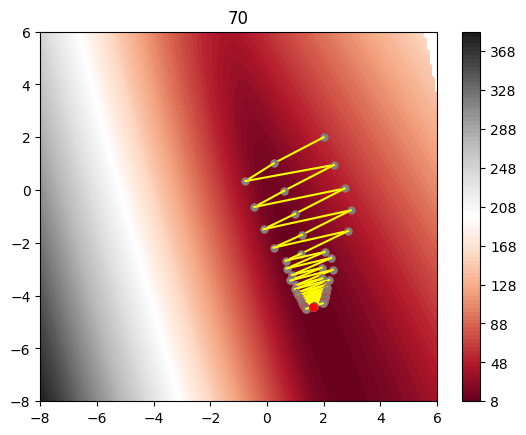

In [10]:
gradient_descent_process(2, 2, 0.1, 0.0000001, 100)